# Linear regression

In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px

## Exploratory data analysis (EDA)

Before you construct any model, it is important to get more familiar with your data. You can do so by performing exploratory data analysis or EDA. 

### Data preparation

In [4]:
# Load data
data = sns.load_dataset('penguins')
# Preview data
# display(data.head(5))

In [5]:
# Rename columns
data = data.rename(columns={'bill_length_mm': 'bill_length', 'bill_depth_mm': 'bill_depth', 'flipper_length_mm': 'flipper_length', 'body_mass_g': 'body_mass', 'sex': 'gender'})

In [6]:
# Display data types
# display(data.info())
# Change data types
data['gender'] = pd.Categorical(data['gender'], categories=['Female', 'Male']) 

### Data cleaning

Remove any errors, inconsistencies, or missing values from the dataset.

In [7]:
# Display total and missing count
display(pd.concat([data.count().rename('total'), data.isna().sum().rename('missing')], axis=1))

,total,missing
species,344,0
island,344,0
bill_length,342,2
bill_depth,342,2
flipper_length,342,2
body_mass,342,2
gender,333,11


In [8]:
# Drop the rows with missing values
data = data.dropna()
# Needs reset_index after removing some rows
if ('index' not in data.columns):
  data = data.reset_index(drop=True)

### Data preview

In [9]:
display(data.head())

,species,island,bill_length,bill_depth,flipper_length,body_mass,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Data visualization 

Use visual techniques such as histograms, scatter plots, and box plots to examine the distribution and relationships between variables.

For a simple linear regression, you want to check for any linear relationships among variables in the dataframe. You can do this by creating scatterplot matrix.

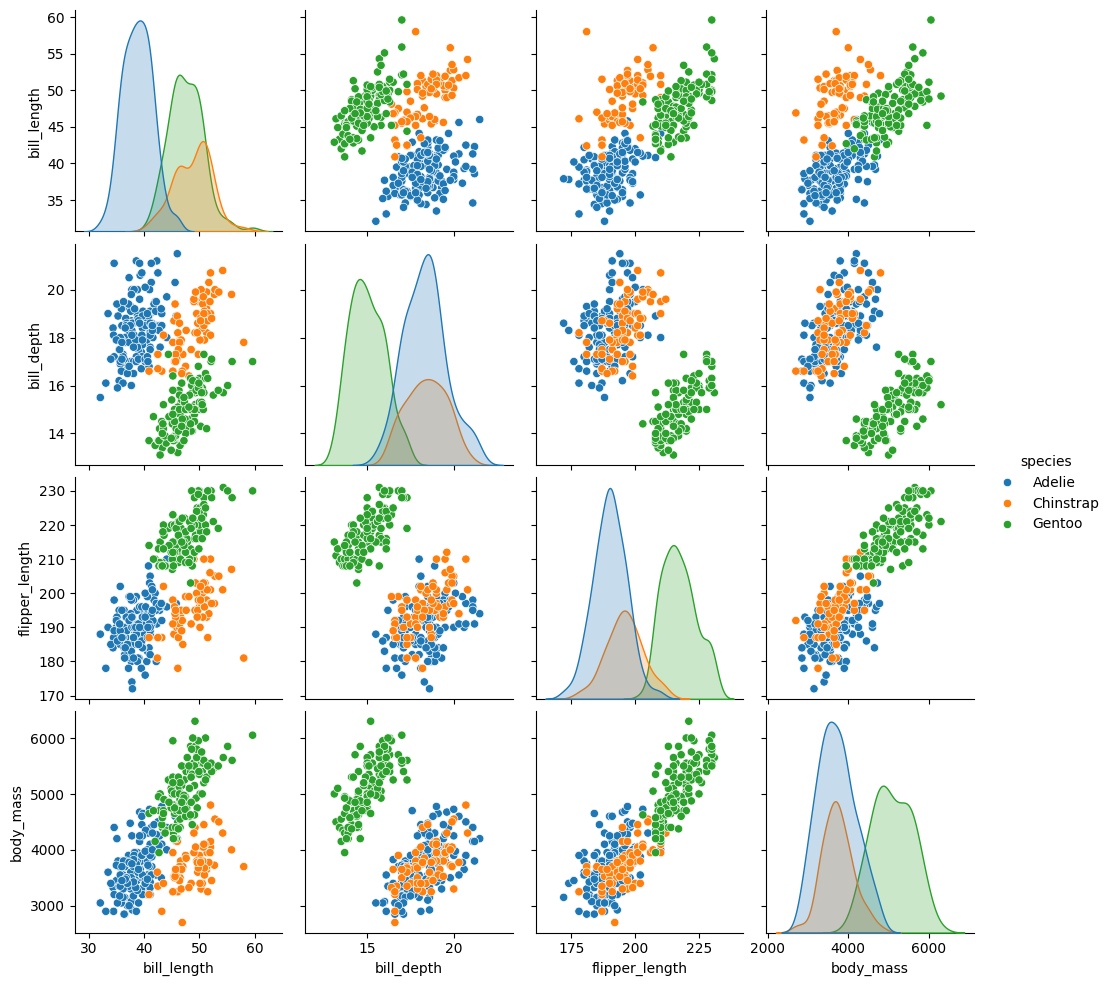

In [10]:
sns.pairplot(data, hue='species')

### Data summarization

Calculate summary statistics such as mean, median, and standard deviation to understand the central tendencies and dispersion of the data.

In [11]:
print(data.groupby('gender', observed=True)['body_mass'].mean())
print()
print(data.groupby('species', observed=True)['body_mass'].mean())

gender
Female    3862.272727
Male      4545.684524
Name: body_mass, dtype: float64

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass, dtype: float64


## Select variables 

### Simple linear regression

Based on the above scatterplots, we could probably run a simple linear regression on any of the three relationships identified. For this notebook, we will focus on the relationship between bill length and body mass.

### Multiple linear egression

## Model construction 

### Simple linear regression

According the simple linear equation

$ y = \beta_0 + \beta_1x $

$ y = \text{intercept} + \text{slope} \times x $

We get

$ \text{body\_mass} = \text{intercept} + \text{slope} \times \text{bill\_length} $

The statsmodels formula will be

$ \text{body\_mass} \textasciitilde \text{bill\_length} $


In [12]:
modelSimple = sm.OLS.from_formula('body_mass ~ bill_length', data=data).fit()
# display(modelSimple.summary())

### Multiple linear regression

Accounding

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $

We get

$ \text{body\_mass} = b_0 + b_1 \times \text{bill\_length} + b_2 \times \text{gender} $

Dummy encode the gener categorical value

$ \text{body\_mass} = b_0 + b_1 \times \text{bill\_length} + b_2 \times \text{gender}_1 \ldots + b_4 \times \text{gender}_3 $

Write forumla in statsmodels

$ \text{body\_mass} \textasciitilde \text{bill\_length} + \text{C(gender)}   $


First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [13]:
modelMultiple = model = sm.OLS.from_formula('body_mass ~ bill_length + C(gender)', data=data).fit()
# modelMultiple.summary()

## Check model assumptions 

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

- Linearity 
- Independent observations (residuals)
- Normality (residuals)
- Homoscedasticity (residuals)

Multiple Linear regression has one more

- No multicollinearity

### Linearity 

#### Simple linear regression

<Axes: xlabel='bill_length', ylabel='body_mass'>

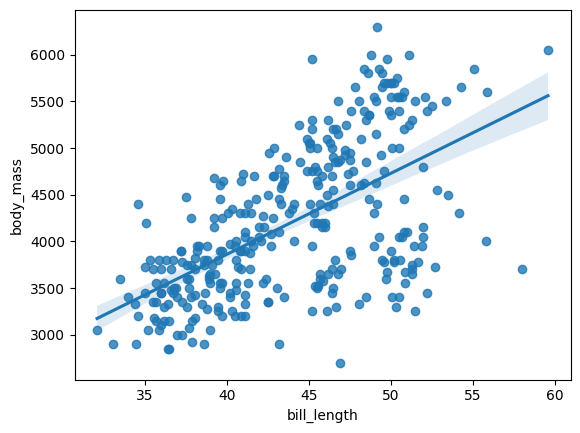

In [14]:
sns.regplot(data, x='bill_length', y='body_mass')

The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

#### Multiple linear regression

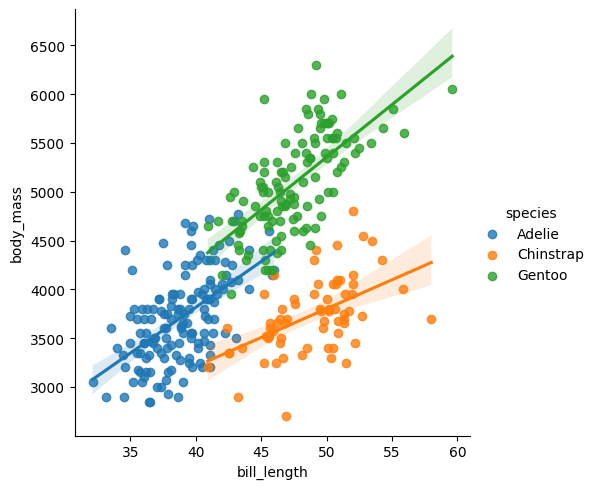

In [15]:
sns.lmplot(data=data, y='body_mass', x='bill_length', hue='species')

According to the plot:

1. Higher bill length has more body mass
1. Gentoo specie has higher body mass than Adelie when same bill_length

Performing a multiple linear regression using these variables will allow us to quantify these relationships and understand whether they are likely to persist for new data.



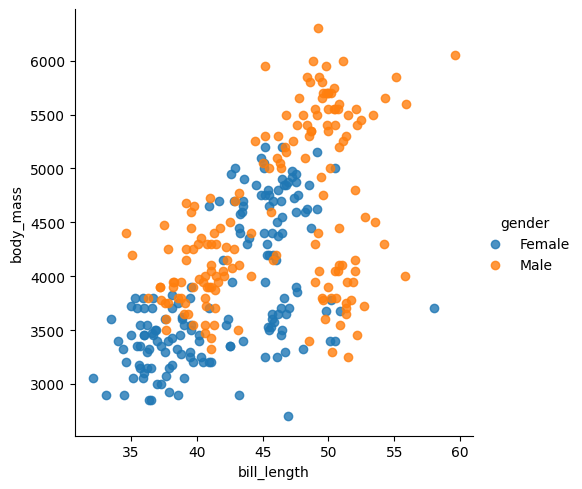

In [16]:
sns.lmplot(data=data, y='body_mass', x='bill_length', hue='gender', fit_reg=False)

### Independence observations 

The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. 

### Normality 

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

-  Plot 1: Histogram of the residuals
-  Plot 2: Q-Q plot of the residuals

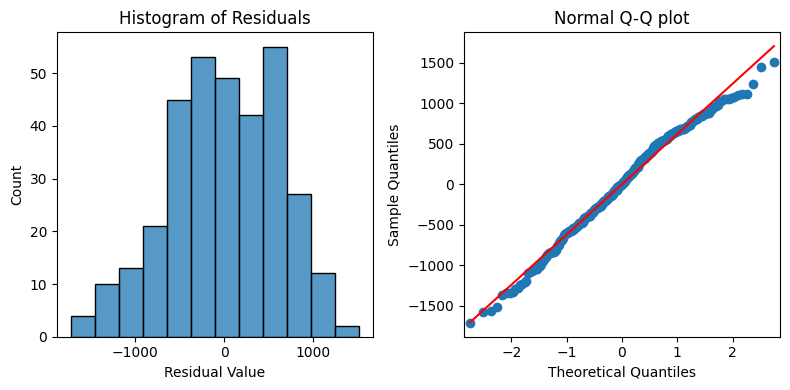

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Histogram
sns.histplot(model.resid, ax=axes[0])
axes[0].set_xlabel('Residual Value')
axes[0].set_title('Histogram of Residuals')

# Q-Q plot
sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title('Normal Q-Q plot')

plt.tight_layout()


Is the normality assumption met?

- The histogram: shows the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.
- The Q-Q plot: show the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

### Homoscedasticity

The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of x.

Create a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

Text(0, 0.5, 'Residuals')

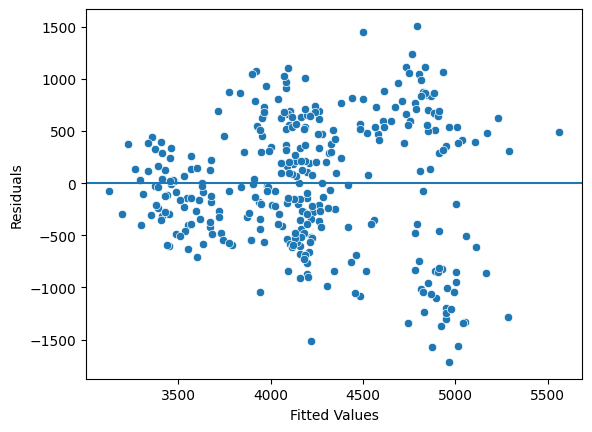

In [18]:
fig = sns.scatterplot(x=modelMultiple.fittedvalues, y=modelMultiple.resid)

# Add reference line at residuals = 0
fig.axhline(0)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

Is the homoscedasticity assumption met?

The plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

### No multicollinearity 


The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [19]:
# sns.pairplot(data)

In [20]:
# Calculate the variance inflation factor

# Create a subset of the data with the continous independent variables.
X = data[['bill_length', 'bill_depth']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
bill_length,29.20756
bill_depth,29.20756


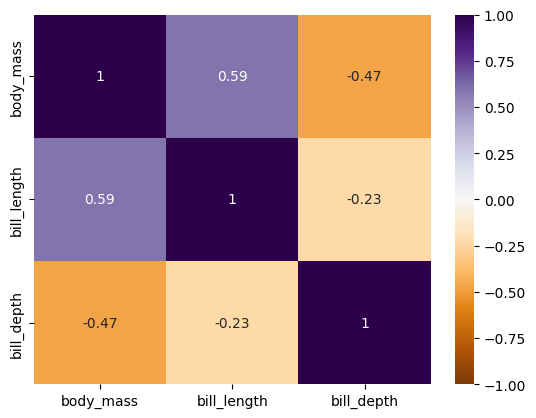

In [21]:
# Use heatmap
corr_data = data[["body_mass", "bill_length", "bill_depth"]]
corr_grid = corr_data.corr()
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()


## Prediction 

### Simple linear regression

In [22]:
modelSimple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              body_mass   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.54e-32
Time:                        16:05:02   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fill the Linear equation with summary data

$ \text{body\_mass} = 388.85 + 86.79 \times \text{bill\_length} $

Now let's predict

If the penguin's bill length is 39.1 mm, what body mass would you predict?

Fill the varaibles into the equation, and we'll get

$ \text{body\_mass} = 388.85 + 86.79 \times 39.1 = 3,782.34 $

I would predict the body mass is 3,782.34g

Or use the `model.predict()` function

In [23]:
predict_data = pd.DataFrame({
  'bill_length': [39.1]
})
print(modelSimple.predict(predict_data))

0    3782.402961
dtype: float64


### Multiple linear regression

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              body_mass   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           9.61e-38
Time:                        16:05:02   Log-Likelihood:                -2614.1
No. Observations:                 333   AIC:                             5234.
Df Residuals:                     330   BIC:                             5246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           746.0634    284.851      2.619      0.009     185.710    1306.417
C(gender)[T.Male]   405.2429     72.818      5.565      0.000     261.997     548.489
bill_length          74.0246      6.667     11.102      0.000      60.908      87.141
==============================================================================
Omnibus:                        7.399   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.107
Skew:                          -0.244   Prob(JB):                       0.0472
Kurtosis:                       2.551   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fill the equation with summary data

$ \text{body\_mass} = 746.06 + 74.02 \times \text{bill\_length} + 405.24 \times \text{Male} $

Predict male, bill_length is 10, what's the body_mass?

$ \text{body\_mass} = 746.06 + 74.02 \times 10 + 405.24 = 1,891.5 $

It's 1,891.5g

In [25]:
predict_data = pd.DataFrame({
  'bill_length': [10],
  'gender': 'Male'
})
modelMultiple.predict(predict_data)

0    1891.551842
dtype: float64

## Interpretation

In [26]:
modelMultiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              body_mass   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           9.61e-38
Time:                        16:05:02   Log-Likelihood:                -2614.1
No. Observations:                 333   AIC:                             5234.
Df Residuals:                     330   BIC:                             5246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           746.0634    284.851      2.619      0.009     185.710    1306.417
C(gender)[T.Male]   405.2429     72.818      5.565      0.000     261.997     548.489
bill_length          74.0246      6.667     11.102      0.000      60.908      87.141
==============================================================================
Omnibus:                        7.399   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.107
Skew:                          -0.244   Prob(JB):                       0.0472
Kurtosis:                       2.551   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. 


### R-squared 

The R-squared is 0.769, this model explains 76.9% of the variation in penguins body mass

We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

### intercept and slopes


**C(gender) - Male**
Given the name of the variable, we know that the variable was encoded as `Male = 1`, `Female = 0`. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

**C(species) - Chinstrap and Gentoo**
Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

**Bill length (mm)**
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

### p-value

p-value (P>|t|)

 Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.